In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

In [2]:
df = pd.read_csv("diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
cnt = [0]*18
for i in range(0, len(df)):
    cnt[df.iloc[i,0]] += 1

cnt

[111, 135, 103, 75, 68, 57, 50, 45, 38, 28, 24, 11, 9, 10, 2, 1, 0, 1]

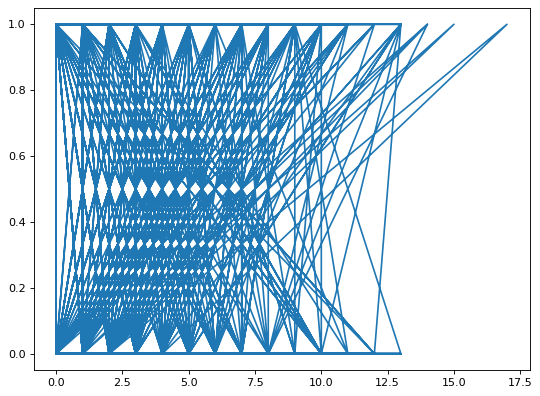

In [4]:
x_value = np.asarray(df['Pregnancies'])
y_value = np.asarray(df['Outcome'])

plt.figure(figsize=(8, 6), dpi=80)

plt.plot(x_value, y_value)
plt.show()

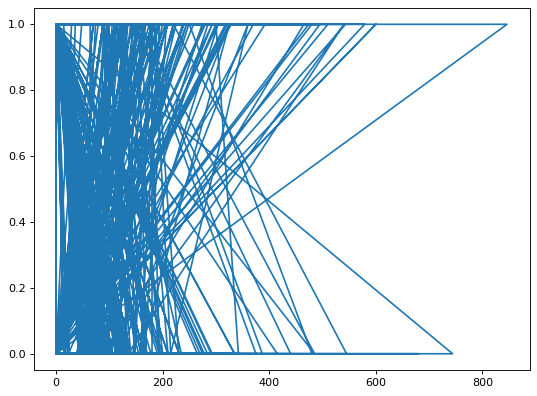

In [5]:
x_value_1 = np.asarray(df['Insulin'])
y_value_1 = np.asarray(df['Outcome'])

plt.figure(figsize=(8, 6), dpi=80)

plt.plot(x_value_1, y_value_1)
plt.show()

In [6]:
X = np.asarray(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [7]:
Y = np.asarray(df['Outcome'])
Y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [8]:
print(X.shape)
print(Y.shape)
print(int(Y[0]==0))
print(X[0][0])

(768, 8)
(768,)
0
6.0


In [9]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print('Train set : ', X_train.shape, Y_train.shape)
print('Test set : ', X_test.shape, Y_test.shape)

Train set :  (614, 8) (614,)
Test set :  (154, 8) (154,)


In [10]:
#Weights = np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])
X_train

array([[7.00e+00, 1.50e+02, 7.80e+01, ..., 3.52e+01, 6.92e-01, 5.40e+01],
       [4.00e+00, 9.70e+01, 6.00e+01, ..., 2.82e+01, 4.43e-01, 2.20e+01],
       [0.00e+00, 1.65e+02, 9.00e+01, ..., 5.23e+01, 4.27e-01, 2.30e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [11]:
X_train = np.insert(X_train, 8, 1, axis = 1)
X_train

array([[7.00e+00, 1.50e+02, 7.80e+01, ..., 6.92e-01, 5.40e+01, 1.00e+00],
       [4.00e+00, 9.70e+01, 6.00e+01, ..., 4.43e-01, 2.20e+01, 1.00e+00],
       [0.00e+00, 1.65e+02, 9.00e+01, ..., 4.27e-01, 2.30e+01, 1.00e+00],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 1.48e-01, 2.10e+01, 1.00e+00],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.00e-01, 3.50e+01, 1.00e+00],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 6.40e-01, 6.90e+01, 1.00e+00]])

In [12]:
def predict(X, W):
    Y = np.dot(X,W)
    for i in range(0,Y.shape[0]):
        Y[i] = 1/(1 + np.exp(-Y[i]))
        #print(Y[i], end = " ")
    
    return Y

In [13]:
def log_loss(Y, y):
    n = Y.shape[0]
    loss = 0
    for i in range(0,n):
        loss += (-Y[i]*np.log(y[i]) - (1 - Y[i])*np.log(1 - y[i]))/n
    
    return loss

In [14]:
def accuracy(Y, y):
    correct = 0
    total = Y.shape[0]
    for i in range(0,total):
        if Y[i]==1 and y[i] >= 0.5:
            correct += 1
        elif Y[i]==0 and y[i] < 0.5:
            correct += 1
    
    return correct/total

In [28]:
def gradient(X, Y, y):
    n = y.shape[0]
    
    grad = np.dot(X.T, y - Y)
    grad = grad*(1/n)
    
    return grad

In [16]:
def gradient_descent(X, Y, W, y):
    grad = gradient(X, Y, y)
    
    grad = grad / np.linalg.norm(grad)
    W = W - learn_rate*grad
    
    return W

In [17]:
def AdaGrad(g, G_prev, G_pres, W):
    temp = G_pres
    G_pres = G_prev + np.square(g)
    
    for i in range(0,9):
        W[i] = W[i] - (learn_rate / mt.sqrt(G_pres[i] + epsilon))*g[i]
    
    return W, G_pres, temp

In [18]:
def RMSprop(g, G_prev, G_pres, W):
    temp = G_pres
    G_pres = alpha*G_prev + (1-alpha)*np.square(g)
    
    for i in range(0,9):
        W[i] = W[i] - (learn_rate / (mt.sqrt(G_pres[i]) + epsilon))*g[i]
    
    return W, G_pres, temp

In [19]:
Weights = np.array([0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001])

In [20]:
Weights.shape


(9,)

In [21]:
yash = np.dot(X_train, Weights)
np.exp(yash[0])

1.617516583676967

In [22]:
Y_pred = predict(X_train, Weights)
Y_pred

array([0.61795849, 0.55863966, 0.73976105, 0.59195013, 0.54913665,
       0.55968358, 0.61486907, 0.58943471, 0.56407647, 0.58940761,
       0.5823189 , 0.54402098, 0.55576208, 0.55565418, 0.56039148,
       0.56753401, 0.55190211, 0.57859417, 0.56214056, 0.56458541,
       0.58336439, 0.58456602, 0.56716287, 0.5790698 , 0.59061734,
       0.55759127, 0.56413967, 0.59207669, 0.57601338, 0.58780361,
       0.56595884, 0.54328811, 0.55019782, 0.56462843, 0.60587892,
       0.60069145, 0.57110673, 0.56632139, 0.55394966, 0.59014407,
       0.55774149, 0.66834916, 0.61999736, 0.64383239, 0.55012555,
       0.56900384, 0.6027982 , 0.61592965, 0.61086888, 0.57788815,
       0.5668825 , 0.56943614, 0.56735557, 0.56979431, 0.59845531,
       0.58473746, 0.57533381, 0.56790827, 0.56842793, 0.56495067,
       0.58889881, 0.58515238, 0.60716669, 0.57309647, 0.57423569,
       0.57310675, 0.5565473 , 0.5560761 , 0.60862997, 0.67270346,
       0.58762964, 0.58653125, 0.60602219, 0.60025795, 0.56934

In [23]:
log_loss(Y_train, Y_pred)

0.7452639055046918

In [24]:
accuracy(Y_train,  Y_pred)

0.35993485342019543

In [29]:
g = gradient(X_train, Y_train, Y_pred)
#print(Y_pred.shape)
g

array([ 0.57398823, 21.34105193, 15.5507907 ,  4.33483276, 15.83246269,
        6.33320743,  0.08344612,  6.38307951,  0.2295346 ])

In [ ]:
g = g / np.linalg.norm(g)
g

In [ ]:
learn_rate = 0.01
#gradient_descent(X_train, Weights, Y_pred )

In [31]:
#opening a file to write the losses and accuracies 

file = open('pclub_output.txt', 'w')
L = []

Epoch 20000 : (Loss: 0.7294543659003534, Correctness: 0.6400651465798045)


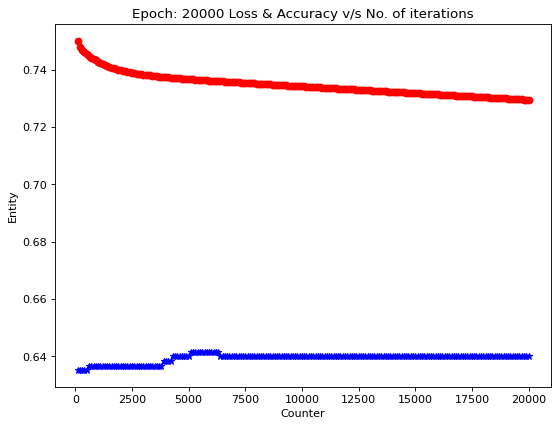

Epoch 21000 : (Loss: 0.728993945781156, Correctness: 0.6400651465798045)


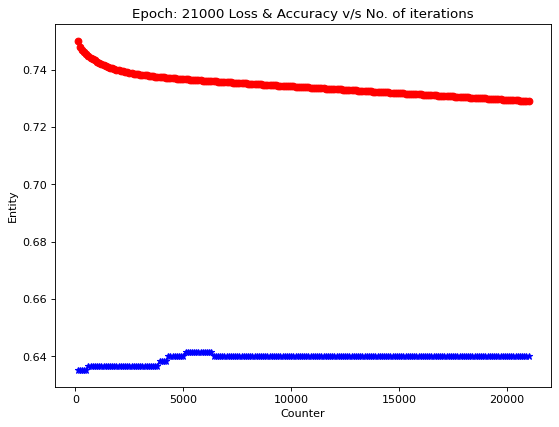

Epoch 22000 : (Loss: 0.7285350610110876, Correctness: 0.6400651465798045)


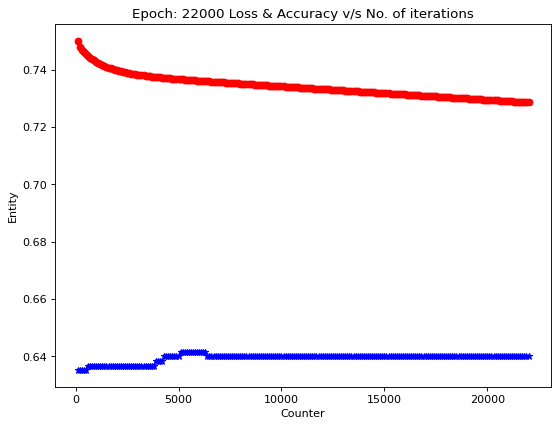

Epoch 23000 : (Loss: 0.7280777058477106, Correctness: 0.6400651465798045)


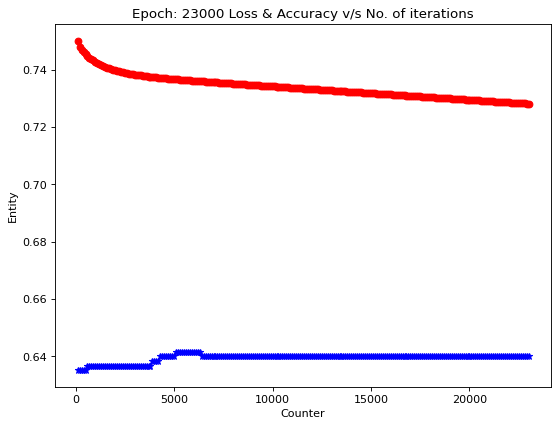

Epoch 24000 : (Loss: 0.7276218745082358, Correctness: 0.6400651465798045)


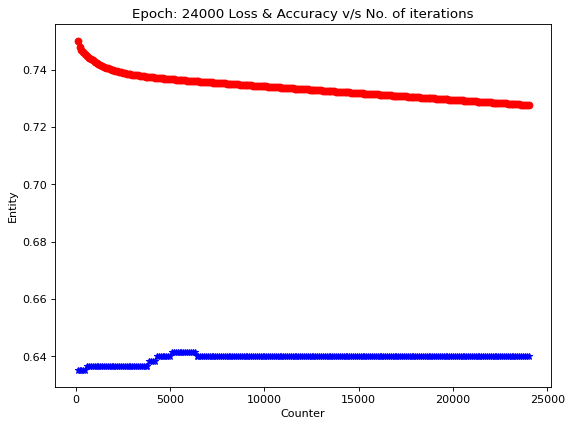

Epoch 25000 : (Loss: 0.7271675611884432, Correctness: 0.6400651465798045)


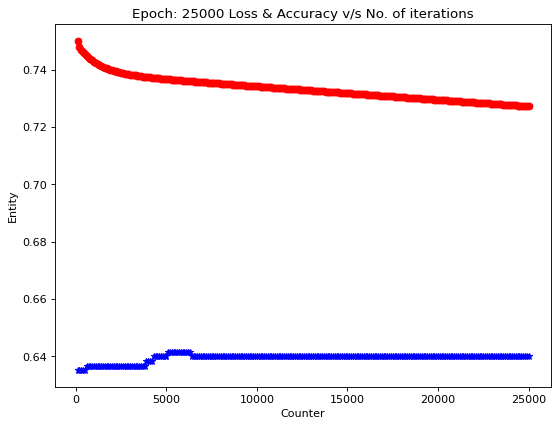

Epoch 26000 : (Loss: 0.726714760078555, Correctness: 0.6400651465798045)


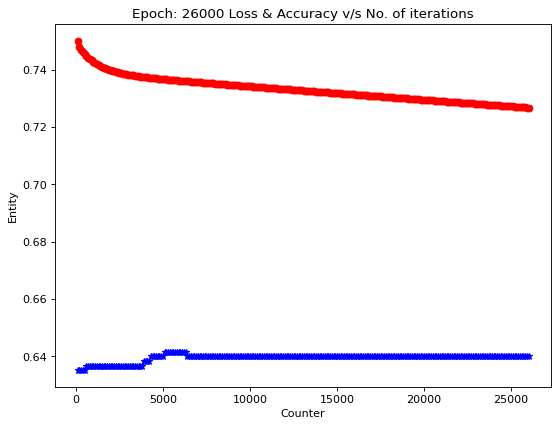

Epoch 27000 : (Loss: 0.7262634653749287, Correctness: 0.6400651465798045)


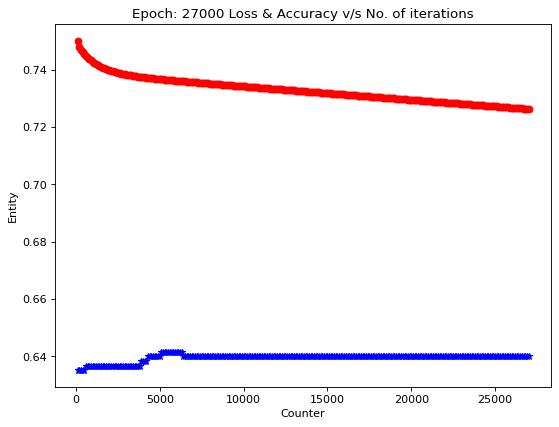

Epoch 28000 : (Loss: 0.7258136712881319, Correctness: 0.6400651465798045)


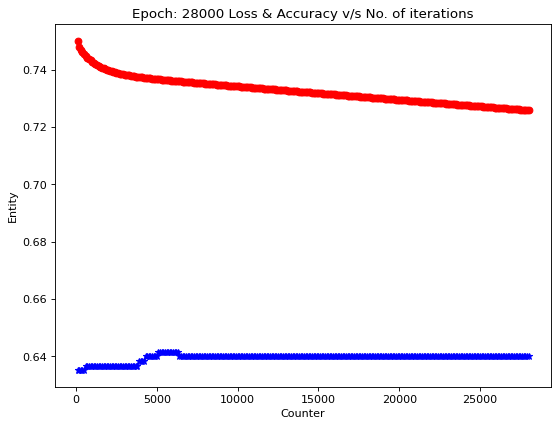

Epoch 29000 : (Loss: 0.7253653720483254, Correctness: 0.6400651465798045)


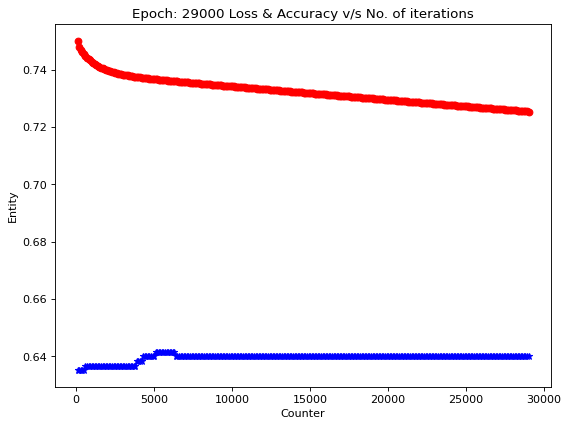

Epoch 30000 : (Loss: 0.7249185619087164, Correctness: 0.6400651465798045)


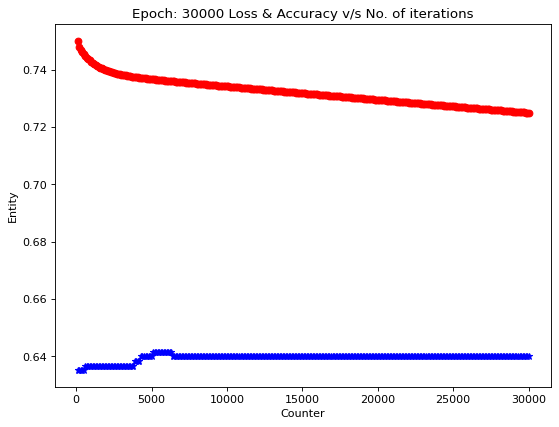

In [32]:
Weights.fill(0.001)
loss = 10000000
acc = 0
counter = 1
learn_rate = 0.01
epsilon = 0.0001
alpha = 0.9

losses = []
accuracies = []
counts = []

G_prev = np.zeros(9)
G_pres = np.zeros(9)

while counter <= 30000 :
    
    #print(counter)
    
    Y_pred = predict(X_train, Weights)
    
    loss = log_loss(Y_train, Y_pred)
    
    acc = accuracy(Y_train, Y_pred)
    
    L.append("Epoch " + str(counter) + " : (" + "Loss: " + str(loss) + ", Correctness: " + str(acc) + ") \n" )
    
    
    Weights = gradient_descent(X_train, Y_train, Weights, Y_pred)
    
    #g = gradient(X_train, Y_train, Y_pred)
    #Weights, G_pres, G_prev = RMSprop(g, G_prev, G_pres, Weights)
    
    if counter%100 == 0:
        losses.append(loss)
        accuracies.append(acc)
        counts.append(counter)
    
    if counter%1000 == 0 and counter >= 20000:
        print("Epoch " + str(counter) + " : (" + "Loss: " + str(loss) + ", Correctness: " + str(acc) + ")" )
        
        plt.figure(figsize=(8, 6), dpi=80)
        
        plt.plot(counts, losses, color = 'red', marker = "o")
        plt.plot(counts, accuracies, color = 'blue', marker = "*")
        
        plt.title("Epoch: " + str(counter) + " Loss & Accuracy v/s No. of iterations")
        plt.xlabel("Counter")
        plt.ylabel("Entity")
        plt.savefig("plot" + str((counter//1000) - 19) + ".png")
        plt.show()
    
    counter += 1
    

In [33]:
file.writelines(L)

In [34]:
X_test = np.insert(X_test, 8, 1, axis = 1)
X_test

array([[1.000e+00, 1.990e+02, 7.600e+01, ..., 1.394e+00, 2.200e+01,
        1.000e+00],
       [2.000e+00, 1.070e+02, 7.400e+01, ..., 4.040e-01, 2.300e+01,
        1.000e+00],
       [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.910e-01, 2.500e+01,
        1.000e+00],
       ...,
       [4.000e+00, 1.420e+02, 8.600e+01, ..., 6.450e-01, 2.200e+01,
        1.000e+00],
       [3.000e+00, 1.160e+02, 7.400e+01, ..., 1.070e-01, 2.400e+01,
        1.000e+00],
       [1.000e+00, 1.070e+02, 7.200e+01, ..., 8.210e-01, 2.400e+01,
        1.000e+00]])

In [35]:
Y_test_pred = predict(X_test, Weights)
Y_test_pred

array([0.76118623, 0.45238728, 0.34633631, 0.77355343, 0.3606823 ,
       0.27314508, 0.81246588, 0.68152031, 0.77443335, 0.56512218,
       0.77617075, 0.83822434, 0.38810475, 0.52912881, 0.32945403,
       0.35157997, 0.87252459, 0.3616917 , 0.37337427, 0.62712289,
       0.51491342, 0.35260194, 0.81231329, 0.15656953, 0.45428439,
       0.54692955, 0.26390523, 0.81834537, 0.44812999, 0.46381069,
       0.68153407, 0.46523341, 0.27704424, 0.73410268, 0.57057264,
       0.72019742, 0.72535689, 0.34099978, 0.69652564, 0.80555508,
       0.51382774, 0.27833853, 0.57040271, 0.78525624, 0.93902922,
       0.29627422, 0.52068013, 0.65115585, 0.61473007, 0.4203193 ,
       0.68548347, 0.59788808, 0.91077979, 0.50749463, 0.45340044,
       0.1422284 , 0.30414883, 0.271926  , 0.49262383, 0.93416201,
       0.70230109, 0.77863502, 0.41116884, 0.88715692, 0.68359941,
       0.82764321, 0.62594273, 0.36545474, 0.65609376, 0.34536679,
       0.42063955, 0.91246236, 0.28466474, 0.60576204, 0.68641

In [36]:
log_loss(Y_test, Y_test_pred)

0.6534877915874103

In [37]:
accuracy(Y_test, Y_test_pred)

0.6428571428571429